In [5]:
import pandas as pd

# Daten aus der Excel-Datei lesen
file_path = '/Users/mariu/OneDrive/Documents/Cluster.xlsx'
data = pd.read_excel(file_path, index_col='Paper')

print(data.head())


                                                                             1   \
Paper                                                                             
Irarrázaval u. a. (2021)      Zhdanov, Dmitry, Sudip Bhattacharjee, and Mikh...   
De Smedt u. a. (2021)         Bawack, Ransome Epie, et al. "Artificial intel...   
Gubela und Lessmann (2021)    Verbeke, Wouter, et al. "To do or not to do? C...   
Verboven u. a. (2021)         Ordenes, Francisco Villarroel, and Rosaria Sil...   
De Bock und De Caigny (2021)  De, Soumi, and P. Prabu. "Predicting customer ...   

                                                                             2   \
Paper                                                                             
Irarrázaval u. a. (2021)      Brasse, Julia, et al. "Explainable artificial ...   
De Smedt u. a. (2021)         Deeva, Galina, et al. "Predicting student perf...   
Gubela und Lessmann (2021)    Okasa, Gabriel. "Meta-learners for estimation ...   
Ver

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Textverarbeitung
data = data.fillna("")
data['combined_text'] = data.apply(lambda row: ' '.join(row), axis=1)

# Textvektorisierung
vectorizer = TfidfVectorizer(stop_words='english', max_features=3000, ngram_range=(1,2))

X = vectorizer.fit_transform(data['combined_text'])

# Clusteranalyse
n_clusters = 4 
kmeans = KMeans(n_clusters=n_clusters)
data['cluster'] = kmeans.fit_predict(X)


# Ergebnisse anzeigen
for i in range(n_clusters):
    print(f"Cluster {i}:")
    print(data[data['cluster'] == i].index)
    print("\n")

Cluster 0:
Index(['De Smedt u. a. (2021) '], dtype='object', name='Paper')


Cluster 1:
Index(['Irarrázaval u. a. (2021) ', 'Verboven u. a. (2021)',
       'De Bock und De Caigny (2021)', 'Moreira u. a. (2021)',
       'Topuz und Delen (2021)', 'Baesens, Höppner und Verdonck (2021)',
       'Gosiewska, Kozak und Biecek (2021)'],
      dtype='object', name='Paper')


Cluster 2:
Index(['Cao u. a. (2021'], dtype='object', name='Paper')


Cluster 3:
Index(['Gubela und Lessmann (2021)'], dtype='object', name='Paper')




/Users/mariu/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


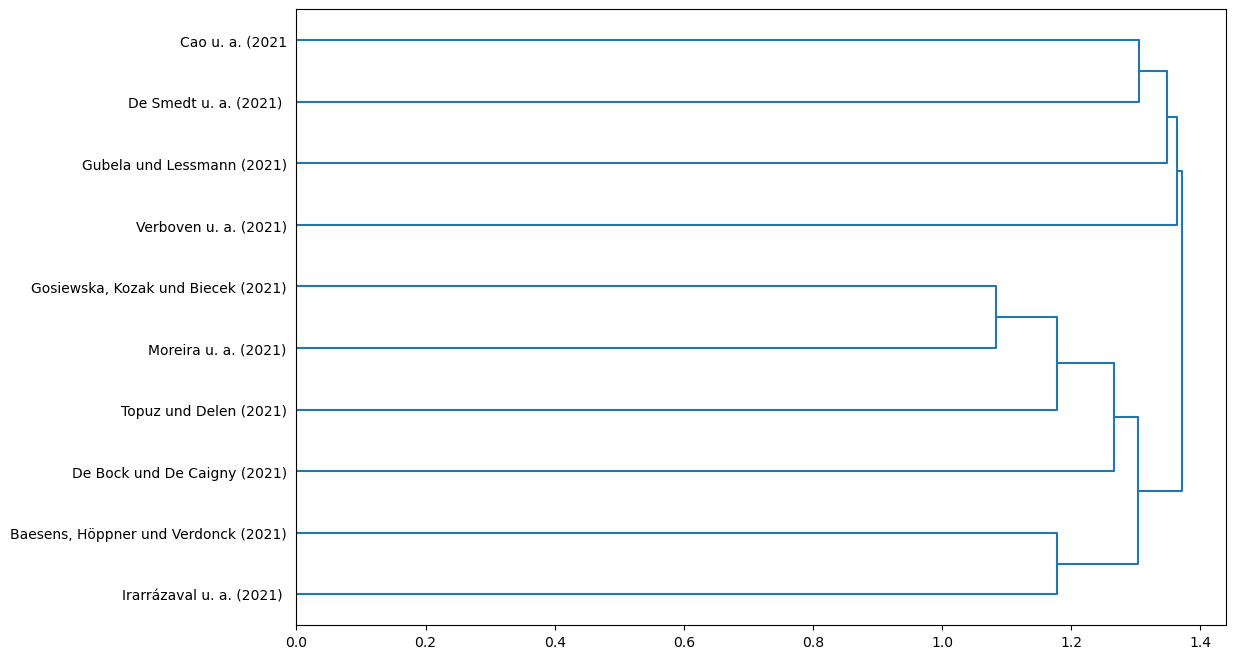

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Hierarchische Clusteranalyse
Z = linkage(X.toarray(), method='ward')  


# Dendrogramm erstellen
plt.figure(figsize=(12, 8))
dendrogram(Z, labels=data.index, orientation='right', leaf_rotation=0, leaf_font_size=10)
plt.axvline(x=15, color='r', linestyle='--') 
plt.show()

